In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
pd.set_option('display.max_columns', None)

#Import the dataset
df=pd.read_csv("I:/archive/understat_per_game.csv")
df.head()
#Create subsets by filtering the original dataframe 
bundesliga = df[df["league"] == "Bundesliga"]
leipzig = bundesliga[bundesliga["team"] == "RasenBallsport Leipzig"]
#Convert the home/away values into numerical equivalents so that mathematical concepts could be applied
bundesliga["h_a_n"] = bundesliga.h_a.replace({"h":1, "a":0})
leipzig["h_a_n"] = leipzig.h_a.replace({"h":1, "a":0})
#Select features for the model 
features = bundesliga[["xG", "h_a_n", "deep", "ppda_coef", "oppda_coef"]]
features_leipzig = leipzig[["xG", "h_a_n", "deep", "ppda_coef", "oppda_coef"]]
#Select the response we want predicted
target = bundesliga["result"]
target_leipzig = leipzig["result"]
target = target.sort_values()
#See if there are any issues
leipzig.head()

<ipython-input-1-1486e24ce706>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bundesliga["h_a_n"] = bundesliga.h_a.replace({"h":1, "a":0})
<ipython-input-1-1486e24ce706>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leipzig["h_a_n"] = leipzig.h_a.replace({"h":1, "a":0})


,league,year,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,xpts,result,date,wins,draws,loses,pts,npxGD,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,team,xG_diff,xGA_diff,xpts_diff,h_a_n
1802,Bundesliga,2016,a,2.475260,1.156240,2.475260,1.156240,7,7,2,2,2.2783,d,2016-08-28 19:30:00,0,1,0,1,1.319020,11.040000,276,25,6.333333,133,21,RasenBallsport Leipzig,0.475260,-0.843760,1.2783,0
1803,Bundesliga,2016,h,0.950658,0.482478,0.950658,0.482478,7,10,1,0,1.8344,w,2016-09-10 20:30:00,1,0,0,3,0.468180,10.676471,363,34,7.315789,139,19,RasenBallsport Leipzig,-0.049342,0.482478,-1.1656,1
1804,Bundesliga,2016,a,3.300090,1.081340,2.542320,1.081340,5,4,4,0,2.7785,w,2016-09-17 17:30:00,1,0,0,3,1.460980,9.903226,307,31,7.850000,157,20,RasenBallsport Leipzig,-0.699910,1.081340,-0.2215,0
1805,Bundesliga,2016,h,1.586820,0.224262,1.586820,0.224262,5,4,1,1,2.5032,d,2016-09-21 22:00:00,0,1,0,1,1.362558,11.862069,344,29,5.781250,185,32,RasenBallsport Leipzig,0.586820,-0.775738,1.5032,1
1806,Bundesliga,2016,a,0.819612,0.366844,0.819612,0.366844,5,4,1,1,1.8089,d,2016-09-25 19:45:00,0,1,0,1,0.452768,9.708333,233,24,14.764706,251,17,RasenBallsport Leipzig,-0.180388,-0.633156,0.8089,0


In [2]:
#Create an empty list to store the different accuracy scores
#we get by changing the n_neighbors argument of the k-NN model
k_range = range(1, 30)
k_values = []

#Create a for loop that tests the model accuracy and calculates
#the 10-fold cross valdiation scores by changing the neighbors argument
for k in k_range:

    knn = KNeighborsClassifier(n_neighbors = k)
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 31, test_size=0.3)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print("Accuracy score of knn for " + str(k) + " neighbors: " + str(accuracy_score(y_test, y_pred)))
    k_values.append(accuracy_score(y_test, y_pred))
    cv = cross_val_score(knn, features, target, cv=10)
    print("Mean value of 10-fold cross validation: " + str(cv.mean()))
    print(" ")
#Print the list of accuracy scores we got by changing the neighbors
print(k_values)


Accuracy score of knn for 1 neighbors: 0.3874773139745917
Mean value of 10-fold cross validation: 0.38370897997867554
 
Accuracy score of knn for 2 neighbors: 0.35934664246823955
Mean value of 10-fold cross validation: 0.3521317083283971
 
Accuracy score of knn for 3 neighbors: 0.3992740471869328
Mean value of 10-fold cross validation: 0.3780039391067409
 
Accuracy score of knn for 4 neighbors: 0.411070780399274
Mean value of 10-fold cross validation: 0.3897161177585594
 
Accuracy score of knn for 5 neighbors: 0.40199637023593465
Mean value of 10-fold cross validation: 0.38998933775619005
 
Accuracy score of knn for 6 neighbors: 0.4056261343012704
Mean value of 10-fold cross validation: 0.40605822769814004
 
Accuracy score of knn for 7 neighbors: 0.44283121597096187
Mean value of 10-fold cross validation: 0.4033282490226277
 
Accuracy score of knn for 8 neighbors: 0.42286751361161523
Mean value of 10-fold cross validation: 0.41150189551001065
 
Accuracy score of knn for 9 neighbors: 0.

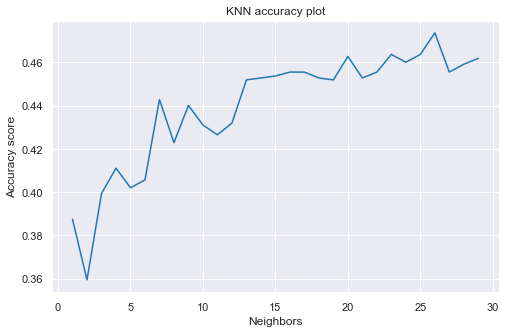

In [16]:
#Plot a line graph that visualizes how the accuracy of our model
#changed by playing with the n_neighbors argument
sns.set_context("notebook")
sns.set_style("darkgrid")
ax = plt.subplots(figsize=(8, 5))
sns.lineplot(k_range, k_values)
plt.title("KNN accuracy plot")
plt.xlabel("Neighbors")
plt.ylabel("Accuracy score")
plt.savefig("KNN Accuracy")
plt.show()

In [4]:
print(target.shape, y_pred.shape)

(3672,) (1102,)


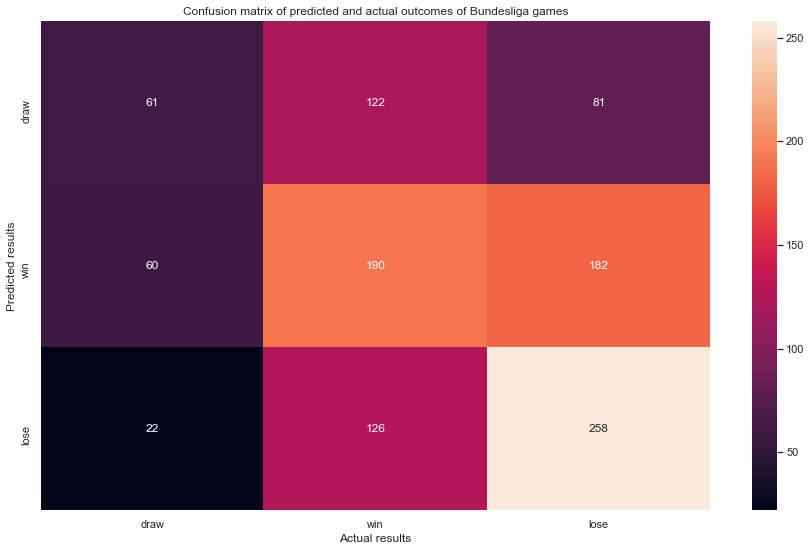

In [18]:
matrix_bundesliga = confusion_matrix(y_test, y_pred)
ax = plt.subplots(figsize=(15, 9))
sns.heatmap(matrix_bundesliga, annot=True, xticklabels=["draw", "win", "lose"], yticklabels=["draw", "win", "lose"], fmt="g")
plt.title("Confusion matrix of predicted and actual outcomes of Bundesliga games")
plt.xlabel("Actual results")
plt.ylabel("Predicted results")
plt.savefig("Total matrix")
plt.show()

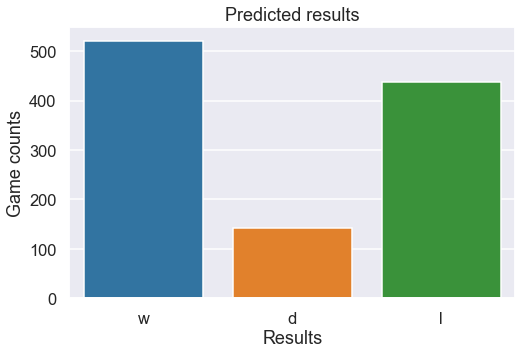

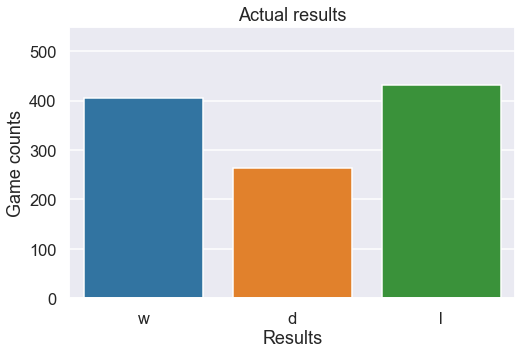

In [19]:
sns.set_context("talk")
sns.set_style("darkgrid")
ax = plt.subplots(figsize=(8, 5))
sns.countplot(y_pred, order=["w", "d", "l"])
plt.title("Predicted results")
plt.xlabel("Results")
plt.ylabel("Game counts")
plt.ylim(0, 550)
plt.savefig("Bundesliga predictions")
plt.show()
ax = plt.subplots(figsize=(8, 5))
sns.countplot(y_test, order=["w", "d", "l"])
plt.title("Actual results")
plt.xlabel("Results")
plt.ylabel("Game counts")
plt.ylim(0, 550)
plt.savefig("Bundesliga actuals")
plt.show()

It seems that the model overestimated the amound of draws and underestimated wins. We could say that the model was rather successful in predicting the losses using the entire Bundesliga dataset.

In [8]:
#Create the k-NN model declaring 26 as the n_neighbors argument
#since that provided the best accuracy score on the above graph
knn = KNeighborsClassifier(n_neighbors=26)
knn.fit(features, target)
leipzig_pred = knn.predict(features_leipzig)
#Create a dataframe of predicted Leipzig game results so that
#we can use .value_counts() while comparing the predictions.
leipzig_pred_df = pd.DataFrame(leipzig_pred)
leipzig_pred_df.columns = ["result"]

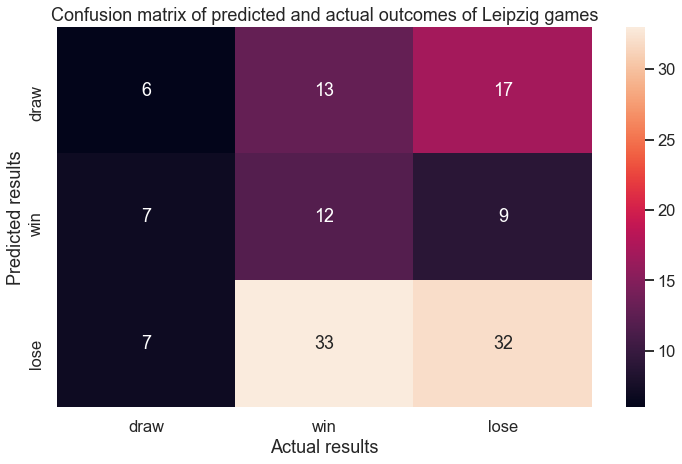

In [20]:
#Plot the confusion matrix of Leipzig game predictions against
#actual results of Leipzig games
matrix_leipzig = confusion_matrix(target_leipzig, leipzig_pred)
ax = plt.subplots(figsize=(12, 7))
sns.heatmap(matrix_leipzig, annot=True, xticklabels=["draw", "win", "lose"], yticklabels=["draw", "win", "lose"])
plt.title("Confusion matrix of predicted and actual outcomes of Leipzig games")
plt.xlabel("Actual results")
plt.ylabel("Predicted results")
plt.savefig("Leipzig matrix")
plt.show()

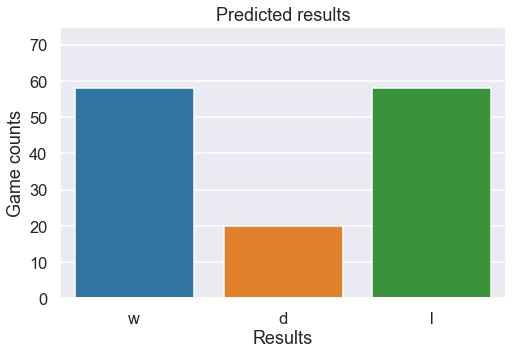

w    58
l    58
d    20
Name: result, dtype: int64


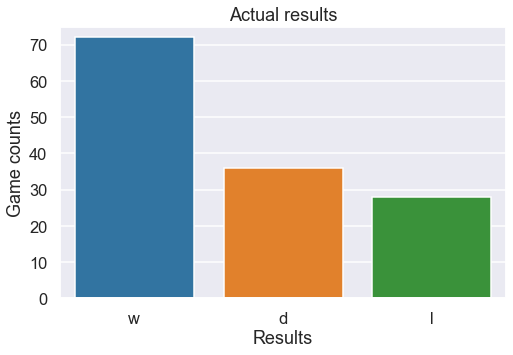

w    72
d    36
l    28
Name: result, dtype: int64


In [21]:
sns.set_context("talk")
sns.set_style("darkgrid")
#Draw the countplot of predicted Leipzig game results
ax = plt.subplots(figsize=(8, 5))
sns.countplot(leipzig_pred, order=["w", "d", "l"])
plt.title("Predicted results")
plt.xlabel("Results")
plt.ylabel("Game counts")
plt.ylim(0, 75)
plt.savefig("Leipzig predictions")
plt.show()
print((leipzig_pred_df["result"].value_counts()))
#Draw the countplot of actual Leipzig game results
ax = plt.subplots(figsize=(8, 5))
sns.countplot(target_leipzig, order=["w", "d", "l"])
plt.title("Actual results")
plt.xlabel("Results")
plt.ylabel("Game counts")
plt.ylim(0, 75)
plt.savefig("Leipzig actuals")
plt.show()
print(target_leipzig.value_counts())